In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_ori = pd.read_csv("london_crime_by_lsoa.csv")
df = df_ori.copy()
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


# **Key Question:**
# *The projection number of criminal types occurred in Greenwich City?*

#### 1. Null value checking

In [13]:
#data = df[["borough", "major_category", "minor_category", "value", "year", "month"]]
for i in df:
    if i == None:
        number_null = data.isnull().sum()
        print(number_null)
    else:
        break
print(f' Congratullation!! There are no null value in your data')

 Congratullation!! There are no null value in your data


#### 2. Crime existance data sorting

The existance of a crime will be determined by value = 1

In [4]:
# creating a new column refer to "value" to be a refrence of data sorting
df["value_label"] = df["value"].copy()
crime_data_existance = df.loc[df.value_label >= 1, ["borough", "major_category", "minor_category", "value", "year", "month"]]
crime_data_existance

,borough,major_category,minor_category,value,year,month
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,Hackney,Violence Against the Person,Harassment,1,2013,2
32,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...
13490581,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,Lewisham,Violence Against the Person,Common Assault,2,2013,7


#### 3. Crime data cleaning occurred only at Greenwich

In [7]:
crime_data_at_Greenwich = crime_data_existance.loc[(df.borough == "Greenwich") , ["major_category", "value", "year", "month"]]
crime_data_at_Greenwich

,major_category,value,year,month
446,Criminal Damage,1,2013,10
695,Violence Against the Person,1,2012,5
812,Theft and Handling,2,2012,12
824,Violence Against the Person,1,2014,9
857,Criminal Damage,1,2014,1
...,...,...,...,...
13490191,Criminal Damage,2,2010,3
13490367,Robbery,2,2015,7
13490419,Violence Against the Person,2,2016,1
13490572,Criminal Damage,1,2013,8


#### 4. Value account

In [22]:
crime_data_at_Greenwich["major_category"].value_counts()
#Theft = {'Theft and Handling': crime_data_at_Greenwich[crime_data_at_Greenwich["major_category"] == 'Theft and Handling'].sum()}
#Theft

major_category
Theft and Handling             32021
Violence Against the Person    30062
Criminal Damage                16479
Burglary                       12902
Drugs                           6415
Robbery                         4006
Other Notifiable Offences       2668
Fraud or Forgery                  71
Sexual Offences                   30
Name: count, dtype: int64

### 5. Plotting

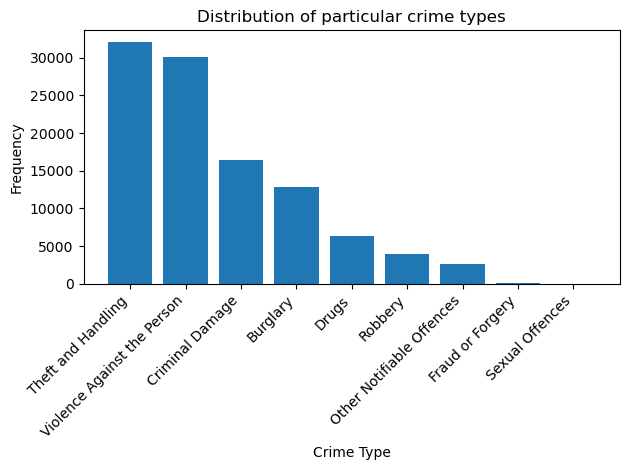

In [38]:
import matplotlib.pyplot as plt

# Data as dictionary (key: crime type, value: number of offenses)
data = {
    'Theft and Handling': 32021,
    'Violence Against the Person': 30062,
    'Criminal Damage': 16479,
    'Burglary': 12902,
    'Drugs': 6415,
    'Robbery': 4006,
    'Other Notifiable Offences': 2668,
    'Fraud or Forgery': 71,
    'Sexual Offences': 0
}

# Extract crime types (keys) and number of offenses (values)
crime_types = list(data.keys())
offense_counts = list(data.values())

# Create a bar chart
plt.bar(crime_types, offense_counts)

# Customize the plot
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.title('Distribution of particular crime types')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()